**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# Predicting Music Genre of Songs using Support Vector Machines

## Abstract

*Precise _summary_ of the whole report, previews the contents and results. Must be a single paragraph between 100 and 200 words.*

## 1. Introduction

### 1.1. Background
Aalto University offers a mandatory and introductory course for Machine Learning, known as Machine Learning Basic Principles. The course deliverables include a Data Analysis Project. The Project can be done alone or in a team of two students; and it shall be done using the Python language in Jupyter Notebook IDE.

### 1.2. Problem Statement
For Autumn 2018, the Data Analysis Project task participating students to create a music-genre classification algorithm. The data analysis project involves the design of a complete machine learning solution. In particular, the project revolves around the task of identifying the music genre of songs. 

### 1.3. Motivation
The primary motivation for us as inspiring machine learning engineers is to solve a real time problem using machine learning. We will learn about approching a machine learning problem from scratch, using variuos python libraries for machine learning, handling a large data set, feature scaling, feature reduction, working with various ML algorithms and their parameters.  

### 1.4. Desctiption of Contents

The feature data set of 10907 songs is provided. 4363 songs have their genres (label) given for training and other 6544 songs are given without labels for testing and hence, the algorithm needs to predict their labels.

## 2. Data analysis

The data provided about songs contain 10907 rows and 264 columns. The columns represents features of the song. The feature vector of each song consists of 264 dimensions: 168 values for the rhythm patterns (24 bands, 7 statistics), 48 values for the chroma (12 bands, 4 statistics), and 48 values for the MFCCs (12 bands, 4 statistics).

4363 rows (songs) and used for training and labels are provided. Other 6544 rows (songs) are for testing and labels needs to be predicted.

The genres corresponds to a numberical as following
1. 'Pop_Rock'
2. 'Electronic'
3. 'Rap'
4. 'Jazz'
5. 'Latin'
6. 'RnB'
7. 'International'
8. 'Country'
9. 'Reggae'
10. 'Blues'

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn.grid_search import GridSearchCV

/Users/gs/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/gs/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Load the data and cleanup
dfx = pd.read_csv("train_data.csv", header = None)
dfy = pd.read_csv("train_labels.csv" , header= None)
dftest =  pd.read_csv("test_data.csv", header = None)
## Create Label List
Y_train=[]
for m in dfy.as_matrix().tolist():
    Y_train += m

/Users/gs/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  import sys


In [3]:
# Normalise Test and Train data
np_scaled_train = preprocessing.quantile_transform(dfx)
X_train = pd.DataFrame(np_scaled_train)

np_scaled_test = preprocessing.quantile_transform(dftest)
X_test = pd.DataFrame(np_scaled_test)

Below, the histogram of class distribution is shown for training labels. It clearly shows that the most songs are from genre 1.

<function matplotlib.pyplot.show(*args, **kw)>

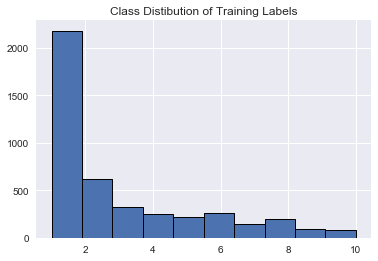

In [74]:
# Analysis of the input data
plt.hist(Y_train, bins=10, histtype='bar', lw=1, ec="black")
plt.title('Class Distibution of Training Labels')
plt.show

In [4]:
# Correlation Matrix
corr_matrix = X_train.corr()
corr_matrix_absolute = X_train.corr().abs()

## 3. Methods and experiments

*- Explain your whole approach (you can include a block diagram showing the steps in your process).* 

*- What methods/algorithms, why were the methods chosen. *

*- What evaluation methodology (cross CV, etc.).*



In [5]:
# Feature Reduction using Upper Triangular Matrix from Corelation Matrix
upper_matrix = corr_matrix_absolute.where(np.triu(np.ones(corr_matrix_absolute.shape), k=1).astype(np.bool))
to_drop_index = [column for column in upper_matrix.columns if any(upper_matrix[column] > 0.90)]

X_train_reduced = X_train.drop(X_train.columns[to_drop_index], axis=1)
X_test_reduced = X_test.drop(X_test.columns[to_drop_index], axis=1)

In [ ]:
## ** WARNING **
## Do not run this block as it normally takes 2-5 hours to execute. 
## This block exist only to find best score, kernel, gamma and other values for SVM method used in next block. 
## Running this block is not required for the purpose of making model & predicting outcomes.

parameter_candidates = [
  {'C': [1, 10, 100, 1000,10000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000,10000], 'gamma': [0.1,0.01,0.001, 0.0001], 'kernel': ['rbf']},
]
clf = GridSearchCV(estimator=SVC(), param_grid=parameter_candidates, n_jobs=-1)
clf.fit(X_train_reduced, Y_train) 
print('Best score for data1:', clf.best_score_) 
print('Best C:',clf.best_estimator_.C) 
print('Best Kernel:',clf.best_estimator_.kernel)
print('Best Gamma:',clf.best_estimator_.gamma)

In [6]:
# Creating ML Model with SVC
model = SVC(kernel = 'rbf', C = 10,gamma=0.01, probability= True).fit(X_train_reduced, Y_train)

In [7]:
# Generating Predictions using Model for both Accuracy and Log-Loss
model_predictions_accuracy = model.predict(X_test_reduced)
model_predictions_log_loss = model.predict_proba(X_test_reduced)

## 4. Results

*Summarize the results of the experiments without discussing their implications.*

*- Include both performance measures (accuracy and LogLoss).*

*- How does it perform on kaggle compared to the train data.*

*- Include a confusion matrix.*

AC0.65970, LL0.16721

In [ ]:
# Export Predictions to File

## Accuracy
np.savetxt("accuracy_solution.csv", 
           np.dstack((np.arange(1, model_predictions_accuracy.size+1),model_predictions_accuracy))[0],
           delimiter=',', comments="", fmt='%i,%i',
           header="Sample_id,Sample_label")

## Log_loss
sample_id_column = np.zeros((X_test_reduced.shape[0],1), dtype=int)
for i in range (X_test_reduced.shape[0]): 
    sample_id_column[i] = i+1
log_loss_solution = np.hstack((sample_id_column, model_predictions_log_loss))
np.savetxt("log_loss_solution.csv", log_loss_solution, 
           delimiter=',', comments="", fmt=','.join(['%i'] + ['%1.10f']*10),
           header="Sample_id,Class_1,Class_2,Class_3,Class_4,Class_5,Class_6,Class_7,Class_8,Class_9,Class_10")

In [15]:
#Confusion matrix ...
model_predict_ytrain = model.predict(X_train_reduced)


In [12]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [10]:
confusion_matrix(Y_train, model_predict_ytrain)

array([[2060,   64,   19,    8,    1,   20,    0,    3,    3,    0],
       [ 117,  471,   18,    2,    0,    8,    0,    0,    2,    0],
       [  26,   11,  283,    0,    2,    3,    0,    0,    1,    0],
       [  60,   12,    3,  168,    1,    7,    0,    1,    1,    0],
       [ 123,    6,   11,    6,   56,    7,    0,    2,    3,    0],
       [  86,   10,   13,    8,    3,  138,    0,    1,    0,    1],
       [ 105,   11,    7,    3,    4,    6,    1,    2,    2,    0],
       [ 104,    1,    1,    2,    1,    3,    0,   83,    0,    0],
       [  12,    2,   13,    0,    1,    3,    0,    0,   61,    0],
       [  61,    1,    3,    3,    1,    3,    0,    2,    0,   12]])

In [13]:
accuracy_score(Y_train, model_predict_ytrain)

0.7639239055695622

## 5. Discussion/Conclusions

*Interpret and explain your results *

*- Discuss the relevance of the performance measures (accuracy and LogLoss) for
imbalanced multiclass datasets. *

*- How the results relate to the literature. *

*- Suggestions for future research/improvement. *

*- Did the study answer your questions? *



## 6. References

*List of all the references cited in the document*

## Appendix
*Any additional material needed to complete the report can be included here. For example, if you want to keep  additional source code, additional images or plots, mathematical derivations, etc. The content should be relevant to the report and should help explain or visualize something mentioned earlier. **You can remove the whole Appendix section if there is no need for it.** *